# Exploratory Analysis of California State Board of Pharmacy Sterile Compounding Licenses

The pharmacy data utilized in this analysis was retrieved from the California State Board of Pharmacy License Verification Database on 11/24/2024 at 2:53pm CST.  Please visit https://search.dca.ca.gov/results for more information. 

## Notebook Setup

In [10]:
pip install matplotlib

     ---------------------------------------- 0.0/167.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/167.9 kB ? eta -:--:--
     --------------- --------------------- 71.7/167.9 kB 777.7 kB/s eta 0:00:01
     -------------------------------------- 167.9/167.9 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB 10.9 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.8 MB 20.0 MB/s eta 0:00:01
   -------------------- ------------------- 4.1/7.8 MB 32.4 MB/s eta 0:00:01
   ---------------------------------------  7.7/7.8 MB 44.8 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 41.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/221.0 kB ? eta -:--:--
   ---------------------------------------- 221.0/221.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -----------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\bvlma\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Set pandas to display more rows/columns for wider dataframes
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)     # Adjust rows
pd.set_option('display.width', 1000)       # Increase width for better visibility

#pd.reset_option('all') 

## Load Pharmacy Data

In [22]:
pharmacies = pd.read_csv('sterile_compounding_pharmacy_data_2.csv')
pharmacies.head()

,Title,License Number,License Type,License Status,Expiration Date,City,State,County,Zip
0,986 INFUSION PHARMACY #1 INC,LSC 101414,STERILE COMPOUNDING PHARMACY,CLEAR,"JULY 1, 2025",ANAHEIM,CALIFORNIA,ORANGE,92807
1,A & O SPECIALTY PHARMACY,LSC 101817,STERILE COMPOUNDING PHARMACY,CLEAR,"MARCH 1, 2025",SALINAS,CALIFORNIA,MONTEREY,93901
2,ACCREDO HEALTH GROUP INC,NSC 101280,NONRESIDENT STERILE COMPOUNDING PHARMACY,CLEAR,"DECEMBER 1, 2025",WARRENDALE,PENNSYLVANIA,OUT OF STATE,15086
3,ACCREDO HEALTH GROUP INC,NSC 101279,NONRESIDENT STERILE COMPOUNDING PHARMACY,CLEAR,"DECEMBER 1, 2025",ORLANDO,FLORIDA,OUT OF STATE,32822
4,ADVANCE CARE PHARMACY,LSC 99611,STERILE COMPOUNDING PHARMACY,CLEAR,"JULY 1, 2025",ESCONDIDO,CALIFORNIA,SAN DIEGO,92025


## Inspect Pharmacy Data

The below cells provide statistics and summaries of the entire dataset. 

In [23]:
#Review summary statistics for the numeric columns
pharmacies.describe()

,Zip
count,1680.000000
mean,86952.050000
std,21232.545579
min,15086.000000
25%,93000.500000
50%,93301.000000
75%,95370.000000
max,95901.000000


In [24]:
#Review datatypes and memory usage
pharmacies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            1680 non-null   object
 1   License Number   1680 non-null   object
 2   License Type     1680 non-null   object
 3   License Status   1680 non-null   object
 4   Expiration Date  1680 non-null   object
 5   City             1680 non-null   object
 6   State            1680 non-null   object
 7   County           1680 non-null   object
 8   Zip              1680 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 118.3+ KB


In [30]:
#Review unique titles in pharmacy table
pharmacies['Title'].value_counts()

Title
ACCREDO HEALTH GROUP INC                                             168
ADVENTIST HEALTH SIMI VALLEY                                         168
ADVENTIST HEALTH AND RIDEOUT                                         168
986 INFUSION PHARMACY #1 INC                                          84
ADVANCE CARE PHARMACY                                                 84
ADVENTIST HEALTH AIS CANCER CENTER PHARMACY                           84
ADVENTIST HEALTH BAKERSFIELD - HOSPITAL PHARMACY                      84
ADVENTIST HEALTH DELANO                                               84
A & O SPECIALTY PHARMACY                                              84
ADVENTIST HEALTH GLENDALE                                             84
ADVENTIST HEALTH HANFORD                                              84
ADVENTIST HEALTH LODI MEMORIAL HOSPITAL PHARMACY 1STFLR NORTHWING     84
ADVENTIST HEALTH HOWARD MEMORIAL                                      84
ADVENTIST HEALTH MENDOCINO COAST             

In [26]:
#Count any null values 
pharmacies.isnull().sum()

Title              0
License Number     0
License Type       0
License Status     0
Expiration Date    0
City               0
State              0
County             0
Zip                0
dtype: int64

## Exploring the Pharmacy Data Visually

The below cells are an initial analysis of the pharmacy data utilizing matplotlib.pyplot.  

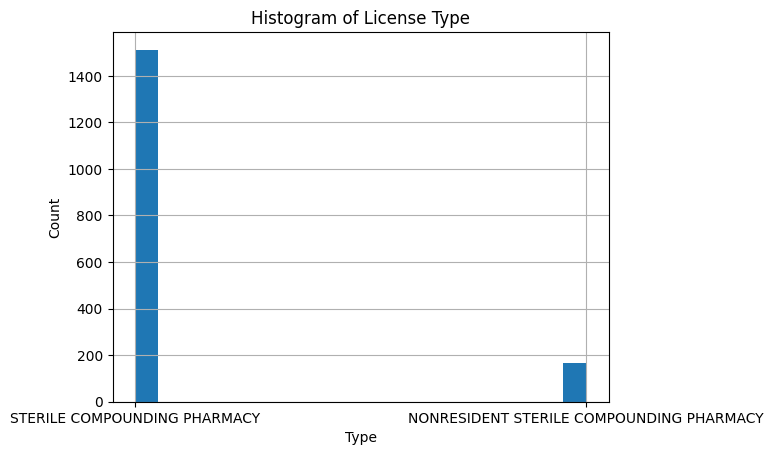

In [32]:
#Create a histogram of the License Type distribution
pharmacies['License Type'].hist(bins=20)
plt.title('Histogram of License Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

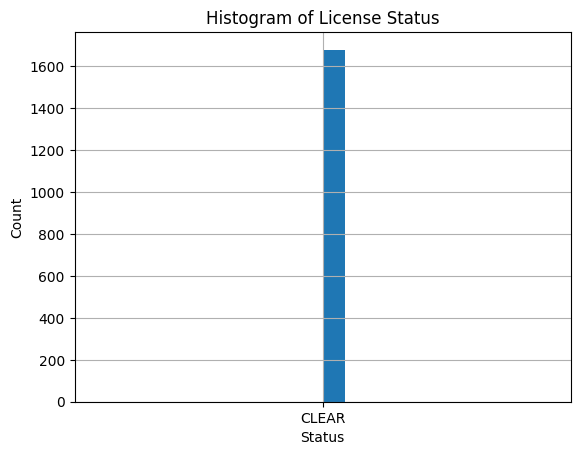

In [29]:
#Create a histogram of the License Status distribution
pharmacies['License Status'].hist(bins=20)
plt.title('Histogram of License Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [31]:
license_number = 'LSC 101807'
filtered_pharmacy = pharmacies[pharmacies['License Number'] == license_number]

# Show the filtered pharmacy information
print(filtered_pharmacy)

Empty DataFrame
Columns: [Title, License Number, License Type, License Status, Expiration Date, City, State, County, Zip]
Index: []
